# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





# **Import Libraries**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom, norm, poisson, expon
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import FuncFormatter

# **Loading Dataset**

In [49]:
url = "/content/Superstore Marketing Data - Sheet1.csv"
data = pd.read_csv(url)

In [50]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [51]:
data.shape

(2240, 22)

In [52]:
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [53]:
copy_data = data.copy()

In [54]:
copy_data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [55]:
copy_data['Income'] = copy_data['Income'].fillna(copy_data['Income'].median())

In [56]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [58]:
copy_data.replace('########', pd.to_datetime('1900-01-01'), inplace = True)

copy_data['Dt_Customer'] = pd.to_datetime(copy_data['Dt_Customer'])

copy_data

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,1900-01-01,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,1900-01-01,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,1900-01-01,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,1900-01-01,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,149,165,63,1,5,4,10,3,0,0


In [59]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

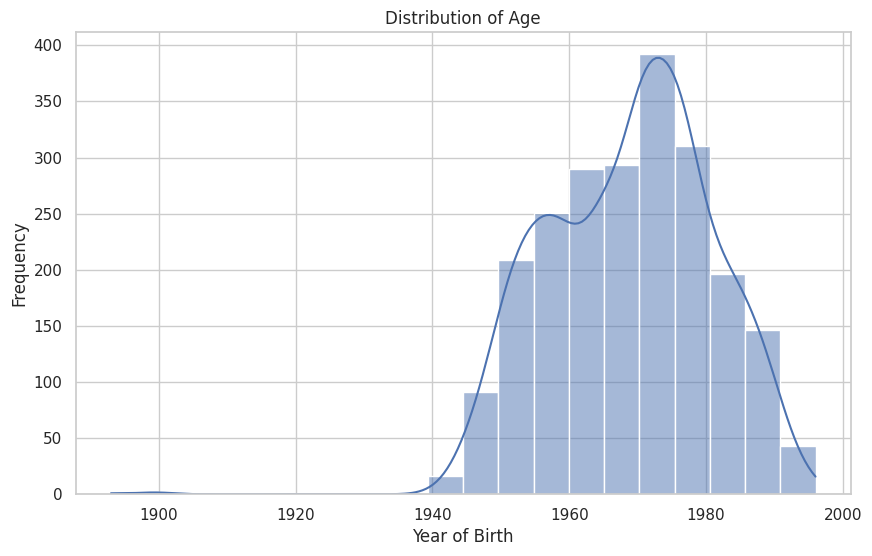

In [60]:
# Visualize the distribution of age using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(copy_data['Year_Birth'], bins=20, kde=True)
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

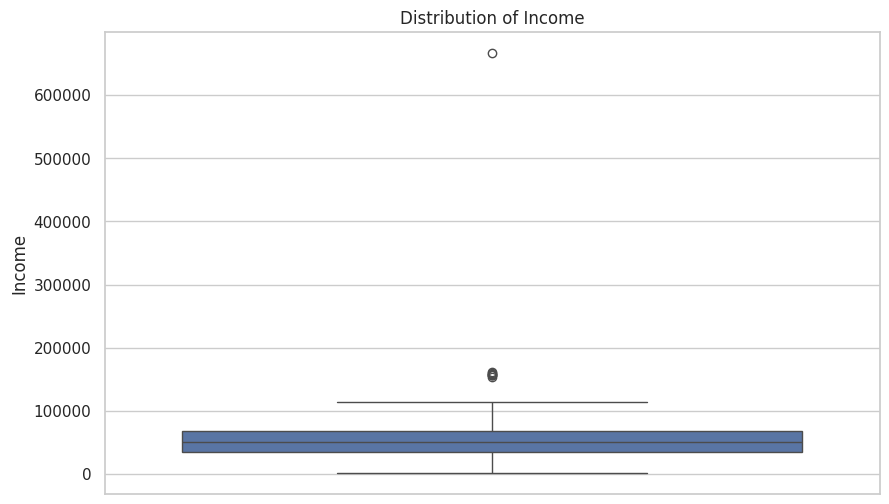

In [61]:
# Visualize the distribution of income using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Income', data=copy_data)
plt.ylabel('Income')
plt.title('Distribution of Income')
plt.show()

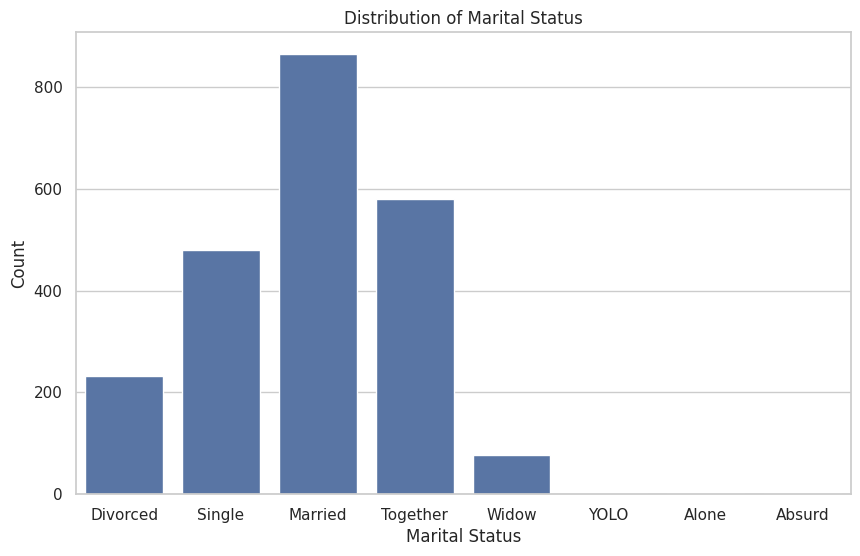

In [62]:
# Visualize the distribution of marital status using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=copy_data)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.show()

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [63]:
# Define key variables
key_variables = ['Year_Birth','Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [64]:
# Calculate measures of central tendency
mean_values = copy_data[key_variables].mean()
median_values = copy_data[key_variables].median()
mode_values = copy_data[key_variables].mode().iloc[0]  # Take the first mode if multiple modes exist

# Print the results
print("Mean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nMode values:")
print(mode_values)

Mean values:
Year_Birth              1968.805804
Income                 52237.975446
MntWines                 303.935714
MntFruits                 26.302232
MntMeatProducts          166.950000
MntFishProducts           37.525446
MntSweetProducts          27.062946
MntGoldProds              44.021875
NumDealsPurchases          2.325000
NumWebPurchases            4.084821
NumCatalogPurchases        2.662054
NumStorePurchases          5.790179
NumWebVisitsMonth          5.316518
dtype: float64

Median values:
Year_Birth              1970.0
Income                 51381.5
MntWines                 173.5
MntFruits                  8.0
MntMeatProducts           67.0
MntFishProducts           12.0
MntSweetProducts           8.0
MntGoldProds              24.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        2.0
NumStorePurchases          5.0
NumWebVisitsMonth          6.0
dtype: float64

Mode values:
Year_Birth              1976.0
Income                 51

In [65]:
# Calculate variance and standard deviation for key numeric variables
variance = copy_data[key_variables].var()
standard_deviation = copy_data[key_variables].std()

# Display the results
print("Variance:\n", variance)
print("\nStandard Deviation:\n", standard_deviation)

Variance:
 Year_Birth             1.436179e+02
Income                 6.268992e+08
MntWines               1.132978e+05
MntFruits              1.581926e+03
MntMeatProducts        5.094743e+04
MntFishProducts        2.984325e+03
MntSweetProducts       1.704080e+03
MntGoldProds           2.721442e+03
NumDealsPurchases      3.733542e+00
NumWebPurchases        7.721252e+00
NumCatalogPurchases    8.544517e+00
NumStorePurchases      1.056873e+01
NumWebVisitsMonth      5.888606e+00
dtype: float64

Standard Deviation:
 Year_Birth                11.984069
Income                 25037.955891
MntWines                 336.597393
MntFruits                 39.773434
MntMeatProducts          225.715373
MntFishProducts           54.628979
MntSweetProducts          41.280498
MntGoldProds              52.167439
NumDealsPurchases          1.932238
NumWebPurchases            2.778714
NumCatalogPurchases        2.923101
NumStorePurchases          3.250958
NumWebVisitsMonth          2.426645
dtype: float64


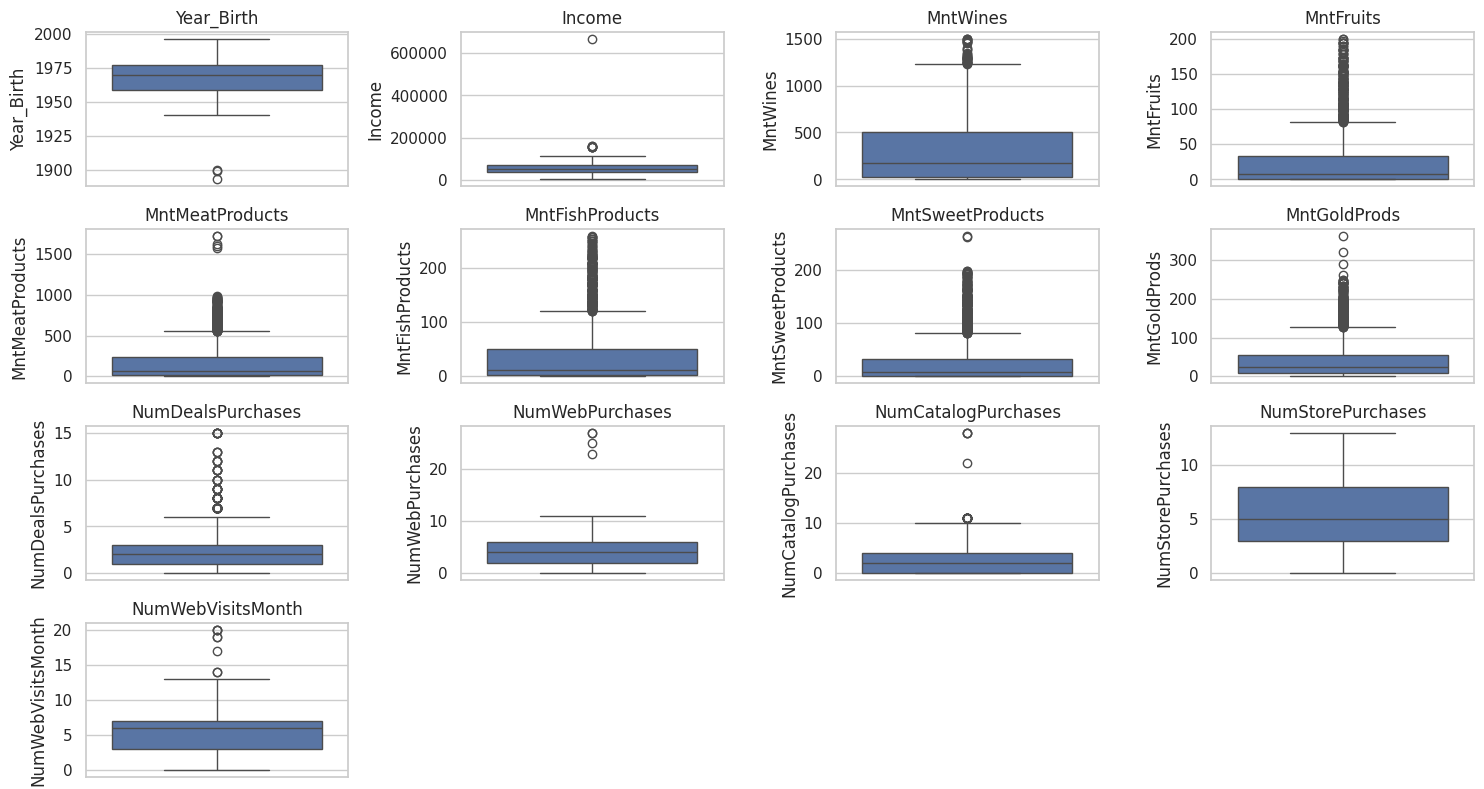

In [66]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_variables):
    plt.subplot(5, 4, i+1)
    sns.boxplot(copy_data[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [67]:
# Calculate Z-scores for each column
z_scores = stats.zscore(copy_data[key_variables])

# Identify outliers using Z-score
outliers = (z_scores > 3) | (z_scores < -3)

# Remove rows with outliers
copy_data_no_outliers = copy_data[key_variables][~outliers.any(axis=1)]

# Print the number of outliers found
print("Number of outliers:", outliers.sum())

Number of outliers: Year_Birth              3
Income                  8
MntWines               16
MntFruits              64
MntMeatProducts        37
MntFishProducts        58
MntSweetProducts       62
MntGoldProds           44
NumDealsPurchases      32
NumWebPurchases         4
NumCatalogPurchases     4
NumStorePurchases       0
NumWebVisitsMonth       9
dtype: int64


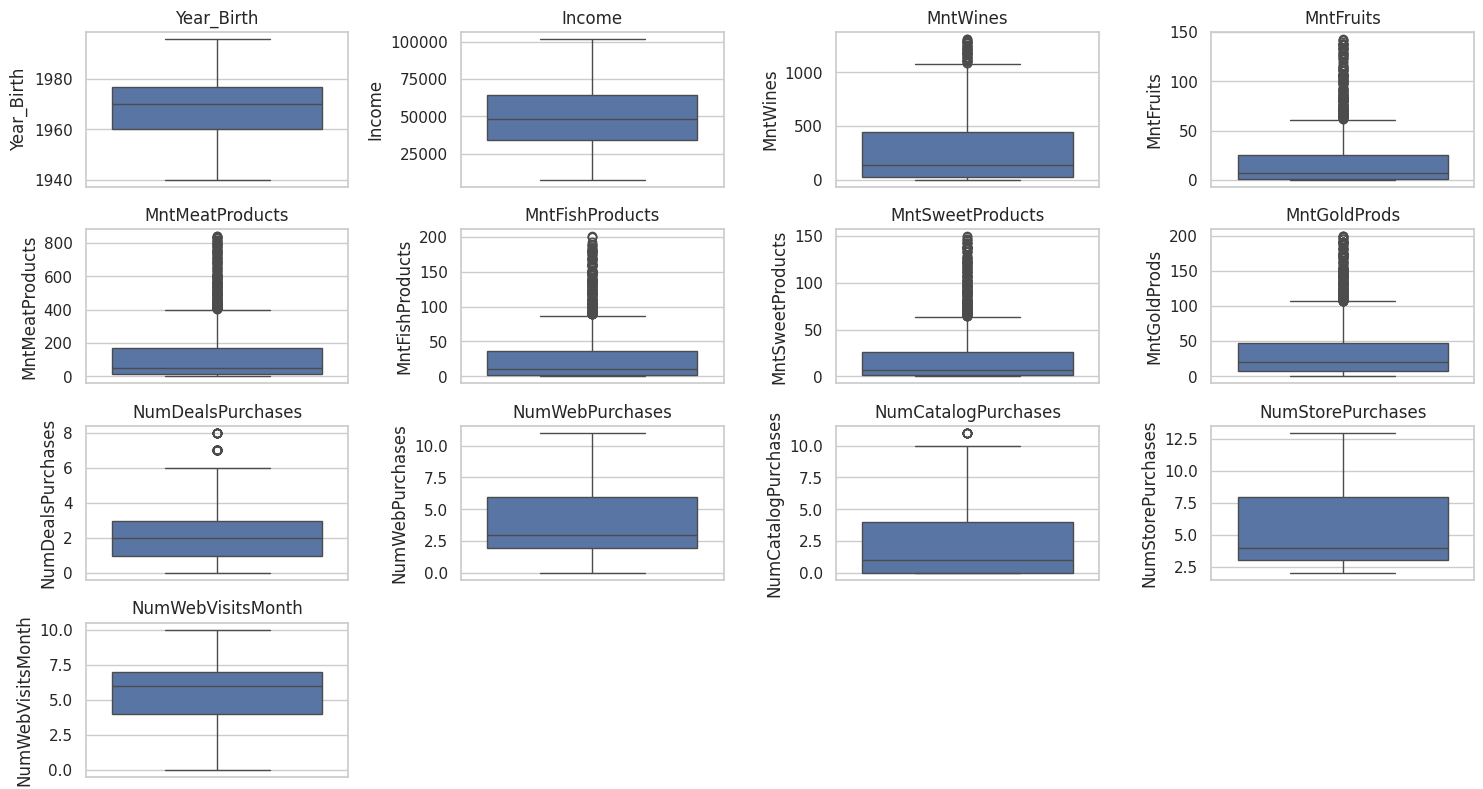

In [68]:
# Create box plots for each numerical column after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_variables):
    plt.subplot(5, 4, i+1)
    sns.boxplot(copy_data_no_outliers[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

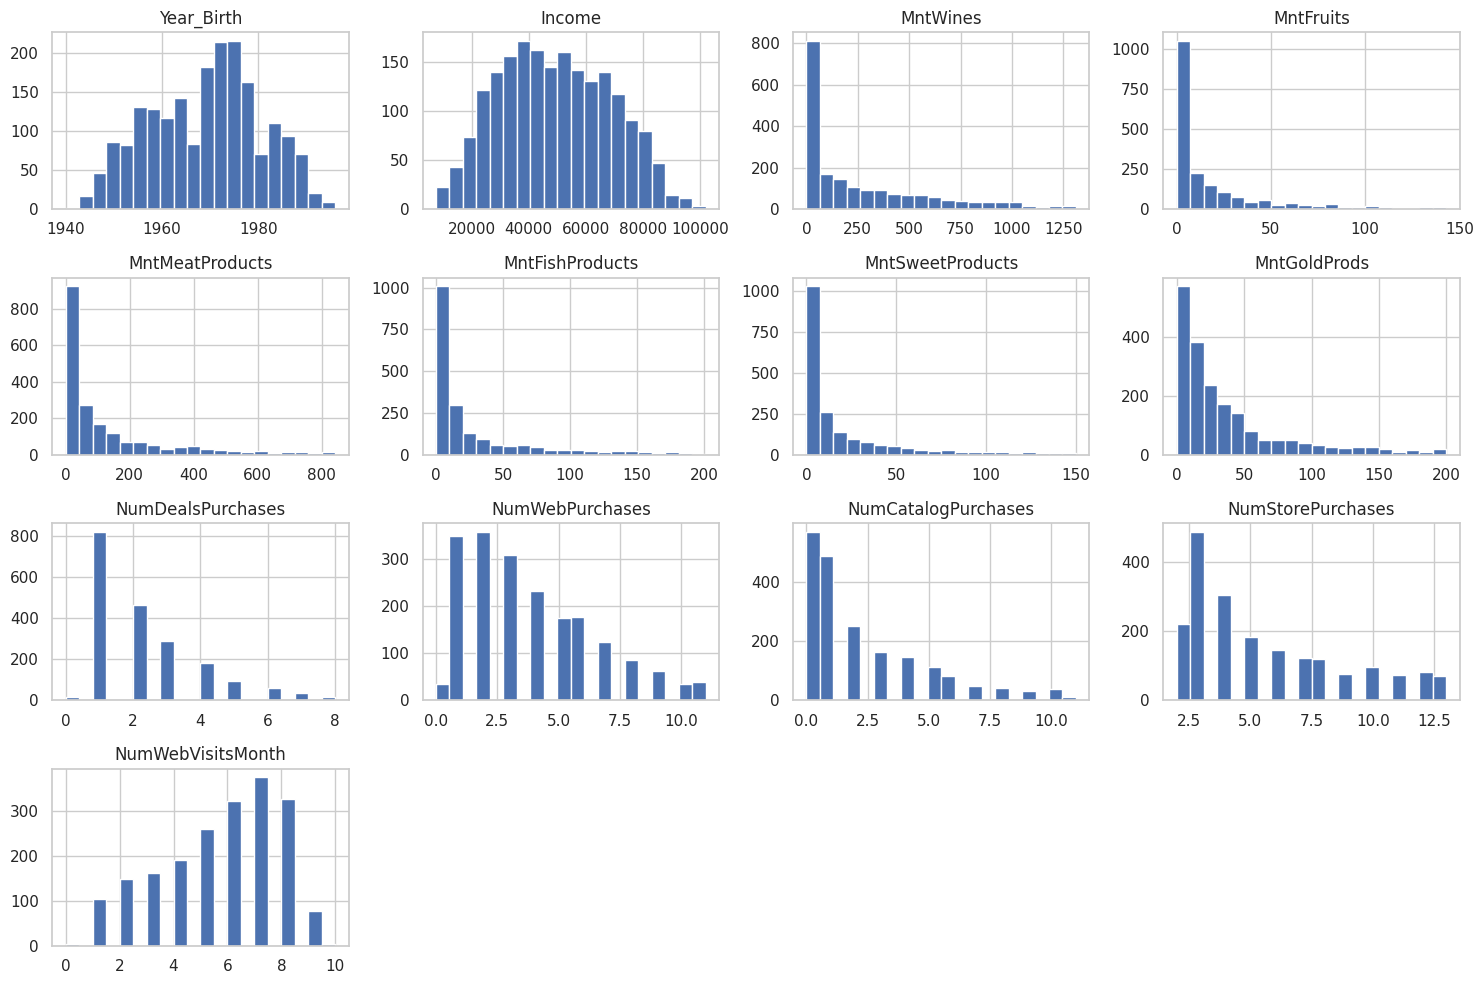

In [69]:
# Plot histograms of key variables
# Selecting only the numerical columns
numerical_columns = copy_data_no_outliers.select_dtypes(include=['int64', 'float64'])

# Plotting histograms for each numerical column
numerical_columns.hist(bins=20, figsize=(15, 10))
plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [70]:
variables = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumWebVisitsMonth']
means = copy_data[variables].mean()
stds = copy_data[variables].std()

In [71]:
# Binomial Distribution (Response)
response_prob = np.mean(copy_data['Response'])  # Probability of response
response_expected = response_prob * len(copy_data)  # Expected number of responses
# Print results
print("Binomial Distribution (Response):")
print("Probability of response:", response_prob)
print("Expected number of responses:", response_expected)

Binomial Distribution (Response):
Probability of response: 0.14910714285714285
Expected number of responses: 334.0


In [72]:
# Normal Distribution
print("Normal Distribution:")
for var, mean, std in zip(variables, means, stds):
    print("Variable:", var)
    print("Mean:", mean)
    print("Standard Deviation:", std)
    print()

Normal Distribution:
Variable: Income
Mean: 52237.97544642857
Standard Deviation: 25037.9558906219

Variable: Recency
Mean: 49.109375
Standard Deviation: 28.962452808378206

Variable: MntWines
Mean: 303.9357142857143
Standard Deviation: 336.5973926053718

Variable: MntFruits
Mean: 26.302232142857143
Standard Deviation: 39.77343376457855

Variable: MntMeatProducts
Mean: 166.95
Standard Deviation: 225.7153725117536

Variable: MntFishProducts
Mean: 37.52544642857143
Standard Deviation: 54.62897940287807

Variable: MntSweetProducts
Mean: 27.06294642857143
Standard Deviation: 41.280498487854935

Variable: MntGoldProds
Mean: 44.021875
Standard Deviation: 52.16743891499733

Variable: NumDealsPurchases
Mean: 2.325
Standard Deviation: 1.932237500855979

Variable: NumWebPurchases
Mean: 4.084821428571429
Standard Deviation: 2.778714147388102

Variable: NumCatalogPurchases
Mean: 2.6620535714285714
Standard Deviation: 2.9231006555397463

Variable: NumStorePurchases
Mean: 5.790178571428571
Standard 

In [73]:
# Poisson Distribution
# Calculate mean for each variable
poisson_means = copy_data[['Kidhome', 'Teenhome', 'Complain']].mean()
print("Poisson Distribution:")
for var, mean in zip(['Kidhome', 'Teenhome', 'Complain'], poisson_means):
    print("Variable:", var)
    print("Mean:", mean)
    print()

Poisson Distribution:
Variable: Kidhome
Mean: 0.44419642857142855

Variable: Teenhome
Mean: 0.50625

Variable: Complain
Mean: 0.009375



In [74]:
# Exponential Distribution (Dt_Customer)
copy_data_customer_avg = (copy_data['Dt_Customer'].max() - copy_data['Dt_Customer'].min()) / len(copy_data)  # Average time between sign-ups
lambda_param = 1 / copy_data_customer_avg.total_seconds()  # Rate parameter for exponential distribution
exp_prob = 1 - np.exp(-lambda_param * copy_data_customer_avg.total_seconds())  # Probability of a customer signing up in the average time period
exp_expected = 1 / lambda_param  # Expected value
print("Dt_Customer - Exponential Distribution:")
print("Rate parameter:", lambda_param)
print("Probability of a customer signing up in the average time period:", exp_prob)
print("Expected time between sign-ups (in seconds):", exp_expected)

Dt_Customer - Exponential Distribution:
Rate parameter: 6.199853152051274e-07
Probability of a customer signing up in the average time period: 0.6321205588285577
Expected time between sign-ups (in seconds): 1612941.428571


In [75]:
# Discrete Uniform Distribution (Year_Birth)
min_year = copy_data['Year_Birth'].min()
max_year = copy_data['Year_Birth'].max()
uniform_prob = 1 / (max_year - min_year + 1)  # Probability of each year
uniform_expected = (min_year + max_year) / 2  # Expected value
print("Year_Birth - Discrete Uniform Distribution:")
print("Probability of each year:", uniform_prob)
print("Expected value:", uniform_expected)

Year_Birth - Discrete Uniform Distribution:
Probability of each year: 0.009615384615384616
Expected value: 1944.5


In [76]:
# Categorical Distribution (Education, Marital_Status)
categorical_variables = ['Education', 'Marital_Status']
for var in categorical_variables:
    value_counts = copy_data[var].value_counts(normalize=True)  # Normalized value counts
    print(f"{var} - Categorical Distribution:")
    print("Probability distribution:")
    print(value_counts)
    print("Expected value: None")

Education - Categorical Distribution:
Probability distribution:
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
Expected value: None
Marital_Status - Categorical Distribution:
Probability distribution:
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64
Expected value: None


In [77]:
# Geometric Distribution (NumWebVisitsMonth, NumDealsPurchases)
geometric_variables = ['NumWebVisitsMonth', 'NumDealsPurchases']
for var in geometric_variables:
    p = 1 / (copy_data[var].mean() + 1)  # Probability of success
    geometric_prob = (1 - p)**(copy_data[var].mean()) * p  # Probability of the average number of trials before success
    geometric_expected = 1 / p  # Expected value
    print(f"{var} - Geometric Distribution:")
    print("Probability of the average number of trials before success:", geometric_prob)
    print("Expected value:", geometric_expected)

NumWebVisitsMonth - Geometric Distribution:
Probability of the average number of trials before success: 0.06332548295676547
Expected value: 6.316517857142857
NumDealsPurchases - Geometric Distribution:
Probability of the average number of trials before success: 0.13091100004469156
Expected value: 3.325


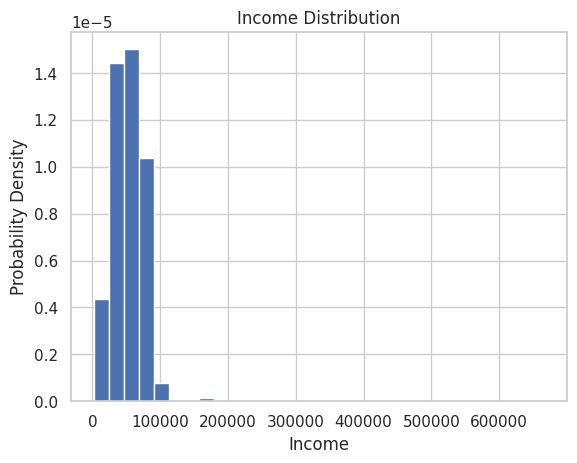

In [78]:
plt.hist(copy_data['Income'], bins=30, density=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Probability Density')
plt.show()

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [90]:
# Calculate total spending and total purchases
copy_data['Total_Spending'] = copy_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
copy_data['Total_Purchases'] = copy_data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Explore relationships
# Descriptive statistics
descriptive_stats = copy_data.groupby('Education')[['Total_Spending', 'Total_Purchases']].mean()

# Limit to two decimal places
descriptive_stats = descriptive_stats.round(2)

print(descriptive_stats)

            Total_Spending  Total_Purchases
Education                                  
2n Cycle            496.53            13.80
Basic                81.80             7.02
Graduation          619.90            14.99
Master              611.78            14.93
PhD                 672.41            15.83


<ipython-input-92-1aaad716c7cf>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


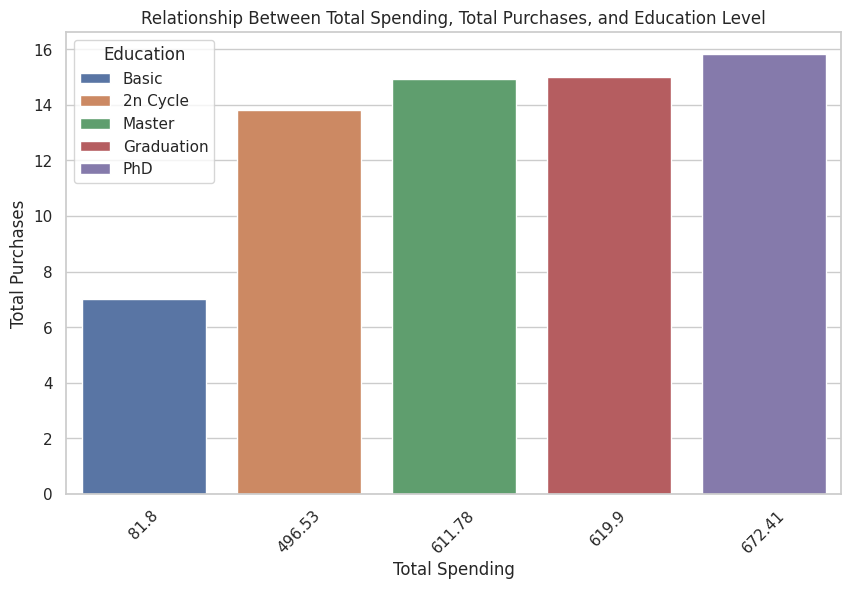

In [92]:
# Visualize the relationship between total spending, total purchases, and education level
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=descriptive_stats, x='Total_Spending', y='Total_Purchases', hue='Education')
plt.xlabel('Total Spending')
plt.ylabel('Total Purchases')
plt.title('Relationship Between Total Spending, Total Purchases, and Education Level')

# Rotate the x-label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [81]:
# Correlation coefficients
corr_matrix = copy_data[['Income', 'Year_Birth', 'Kidhome', 'Teenhome', 'Total_Spending', 'Total_Purchases']].corr()
print(corr_matrix)

                   Income  Year_Birth   Kidhome  Teenhome  Total_Spending  \
Income           1.000000   -0.160899 -0.425326  0.018965        0.664775   
Year_Birth      -0.160899    1.000000  0.230176 -0.352111       -0.111306   
Kidhome         -0.425326    0.230176  1.000000 -0.036133       -0.556669   
Teenhome         0.018965   -0.352111 -0.036133  1.000000       -0.138384   
Total_Spending   0.664775   -0.111306 -0.556669 -0.138384        1.000000   
Total_Purchases  0.563450   -0.168304 -0.477895  0.133163        0.753903   

                 Total_Purchases  
Income                  0.563450  
Year_Birth             -0.168304  
Kidhome                -0.477895  
Teenhome                0.133163  
Total_Spending          0.753903  
Total_Purchases         1.000000  


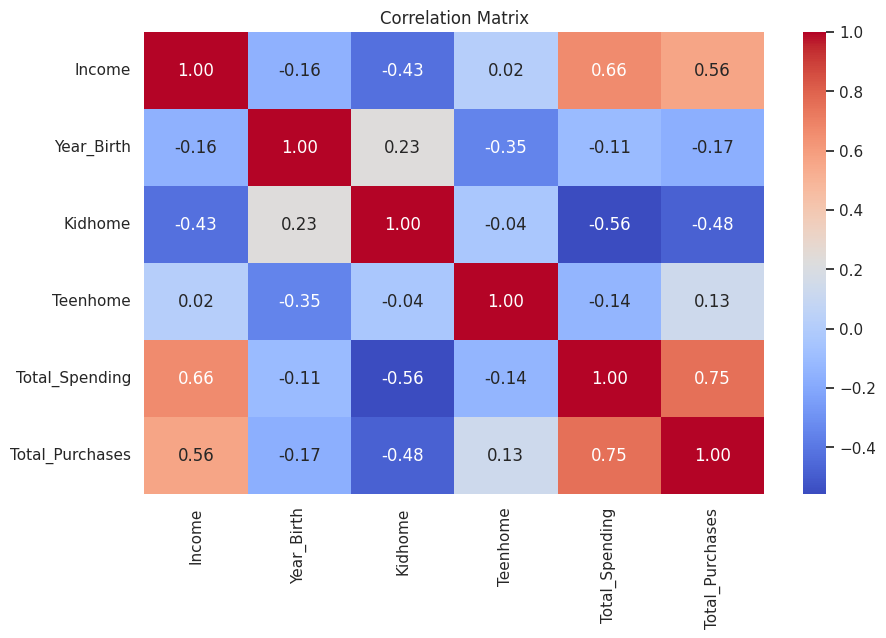

In [93]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

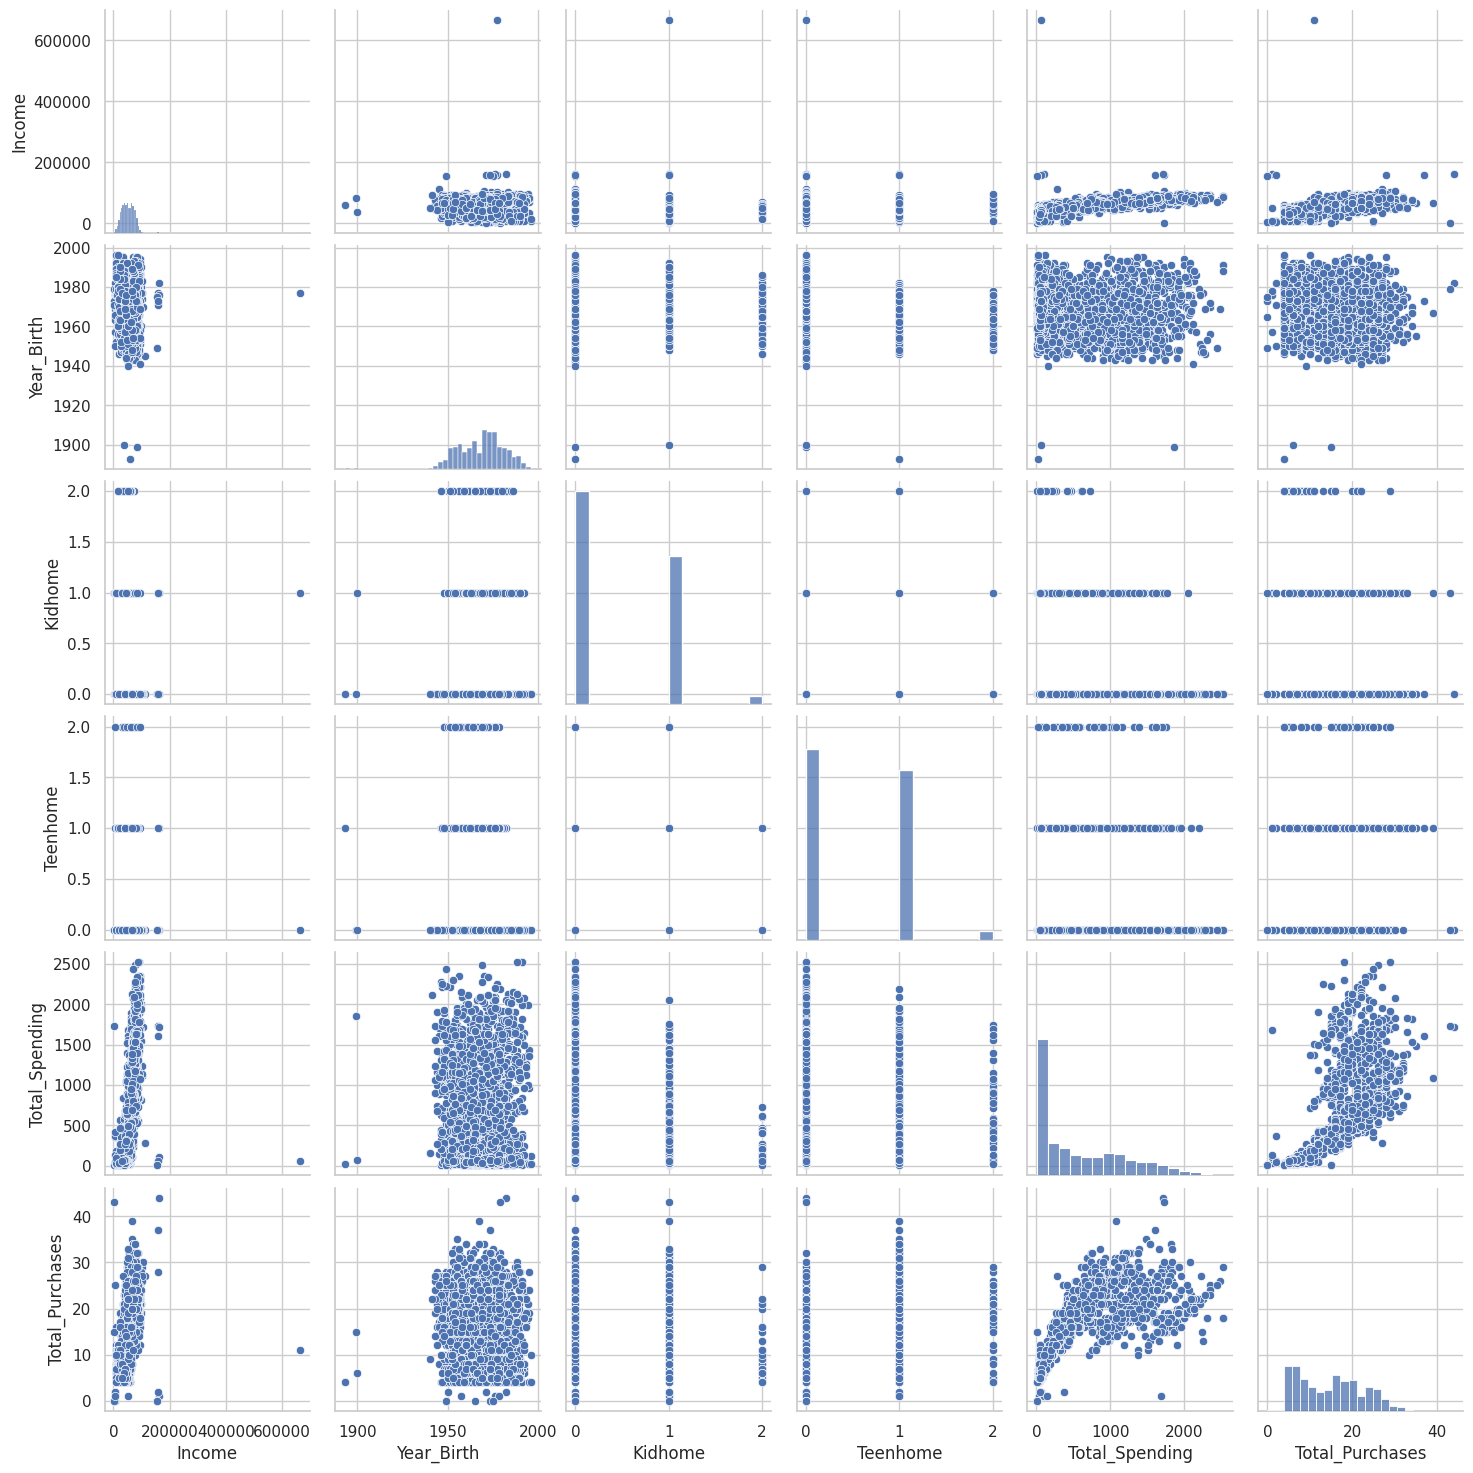

In [82]:
# Visualizations
sns.pairplot(copy_data[['Income', 'Year_Birth', 'Kidhome', 'Teenhome', 'Total_Spending', 'Total_Purchases']])
plt.show()

In [95]:
# Segment customers
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(copy_data[['Total_Spending', 'Total_Purchases', 'Income', 'Year_Birth', 'Kidhome', 'Teenhome']])

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
copy_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze cluster characteristics
cluster_means = copy_data.groupby('Cluster').mean().round(2)
print(cluster_means)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              Id  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
Cluster                                                                        
0        5581.05     1978.17  30381.39     0.84      0.00    48.82     39.74   
1        5586.54     1963.53  41563.65     0.76      0.99    49.85     66.34   
2        5601.26     1968.57  76496.66     0.07      0.01    49.27    607.90   
3        5599.87     1964.27  61233.46     0.11      1.05    48.60    498.27   

         MntFruits  MntMeatProducts  MntFishProducts  ...  MntGoldProds  \
Cluster                                               ...                 
0             7.78            30.45            11.05  ...         20.82   
1             3.85            24.89             6.02  ...         15.53   
2            62.25           454.87            91.36  ...         73.01   
3            31.56           163.91            42.26  ...         65.68   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \


<ipython-input-95-589ee8a9ed5c>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = copy_data.groupby('Cluster').mean().round(2)


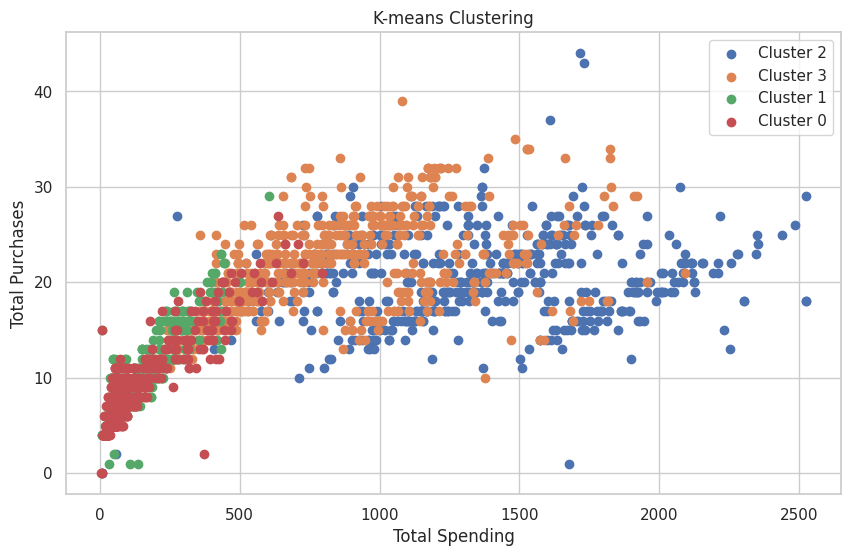

In [103]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
for cluster in copy_data['Cluster'].unique():
    plt.scatter(copy_data[copy_data['Cluster'] == cluster]['Total_Spending'], copy_data[copy_data['Cluster'] == cluster]['Total_Purchases'], label=f'Cluster {cluster}')
plt.xlabel('Total Spending')
plt.ylabel('Total Purchases')
plt.title('K-means Clustering')
plt.legend()
plt.show()

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

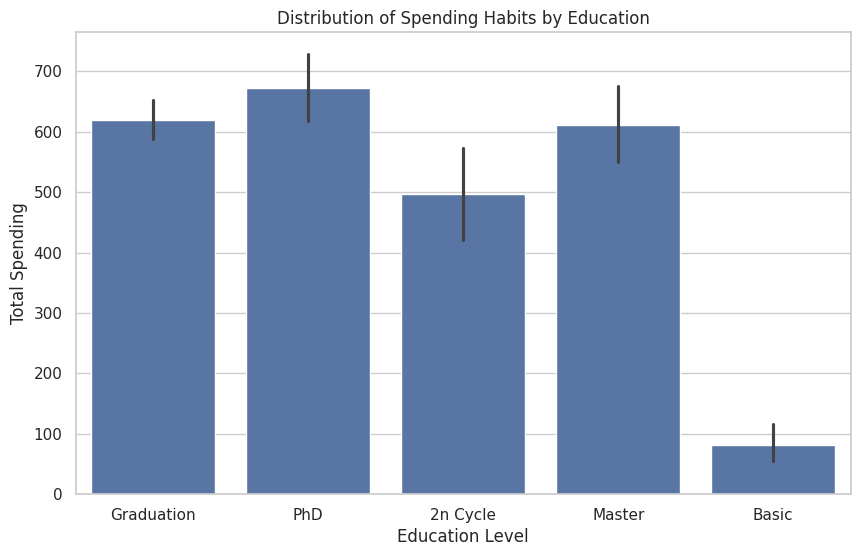

In [104]:
# Visualization
# Distribution of spending habits by Education
plt.figure(figsize=(10, 6))
sns.barplot(data=copy_data, x='Education', y='Total_Spending')
plt.title('Distribution of Spending Habits by Education')
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.show()

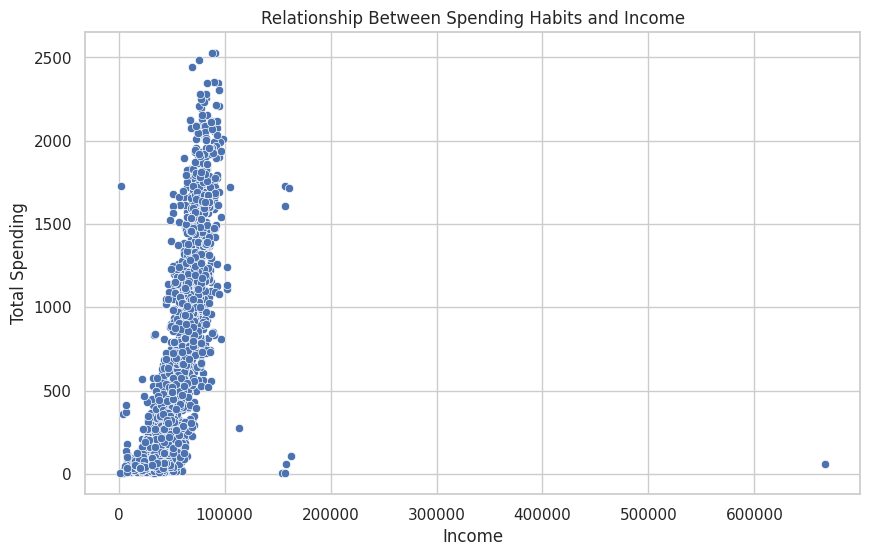

In [105]:
# Relationship between spending habits and income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=copy_data, x='Income', y='Total_Spending')
plt.title('Relationship Between Spending Habits and Income')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

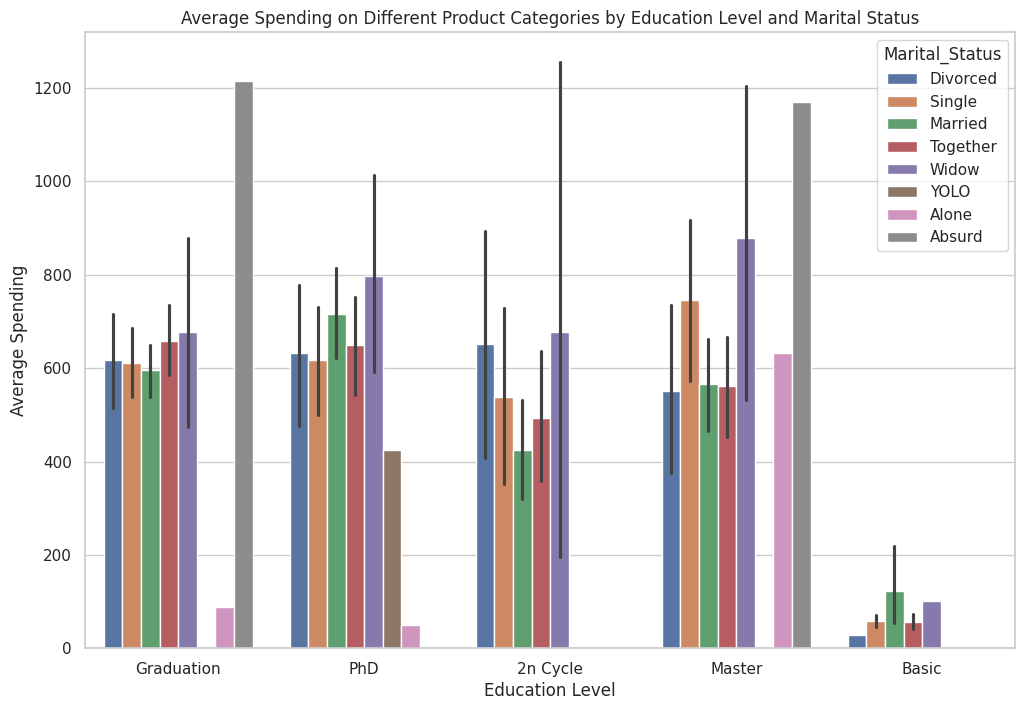

In [106]:
# Visualize average spending on different product categories by education level and marital status
plt.figure(figsize=(12, 8))
sns.barplot(data=copy_data, x='Education', y='Total_Spending', hue='Marital_Status', estimator='mean')
plt.title('Average Spending on Different Product Categories by Education Level and Marital Status')
plt.xlabel('Education Level')
plt.ylabel('Average Spending')
plt.show()

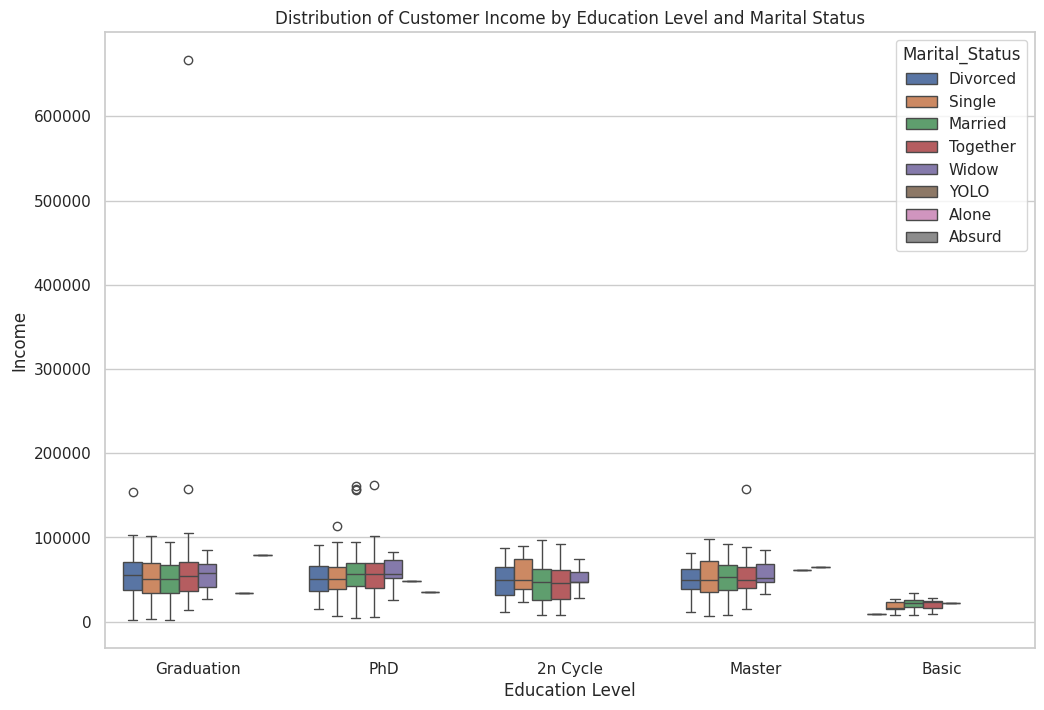

In [107]:
# Visualize distribution of customer income by education level and marital status
plt.figure(figsize=(12, 8))
sns.boxplot(data=copy_data, x='Education', y='Income', hue='Marital_Status')
plt.title('Distribution of Customer Income by Education Level and Marital Status')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

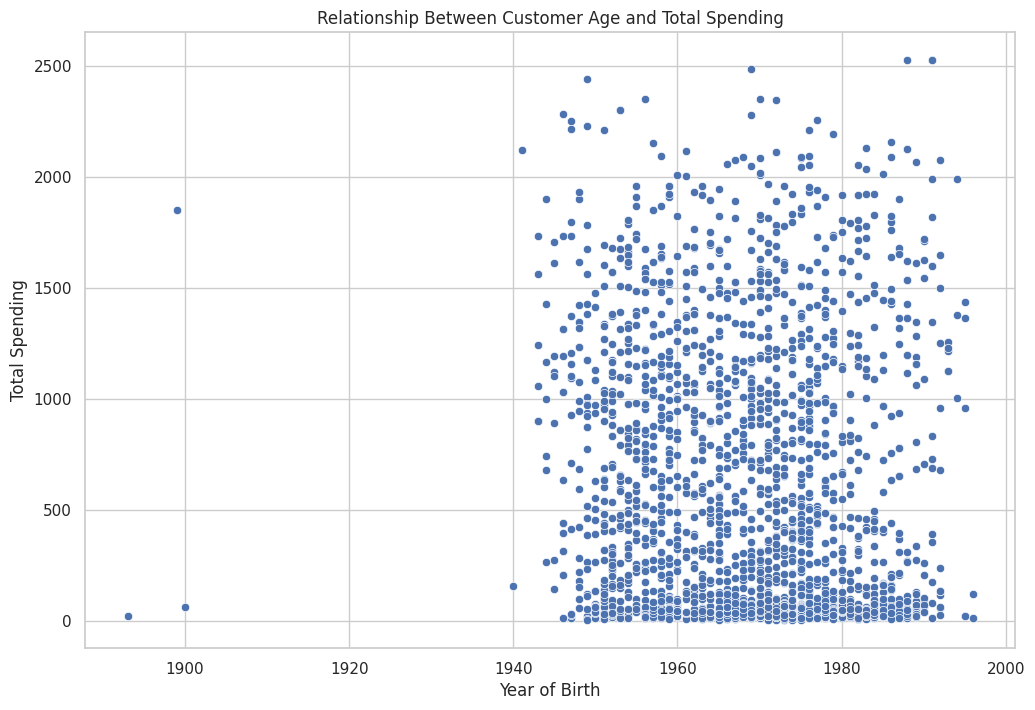

In [108]:
# Visualize relationship between customer age and total spending
plt.figure(figsize=(12, 8))
sns.scatterplot(data=copy_data, x='Year_Birth', y='Total_Spending')
plt.title('Relationship Between Customer Age and Total Spending')
plt.xlabel('Year of Birth')
plt.ylabel('Total Spending')
plt.show()

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍